# Data Scientist Associate Practical Exam Submission

Use this template to complete your analysis and write up your summary for submission.


## Preprocessing

In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# read in the data
data = pd.read_csv("EMO.csv")
data.head()

,owned,make_model,review_month,web_browser,reviewer_age,primary_use,value_for_money,overall_rating
0,1,Nielah-Eyden,Oct,Chrome,23,Commuting,5/10,18.62
1,0,Nielah-Keetra,Jun,NaN,24,Commuting,4/10,15.55
2,0,Lunna-Keetra,23-Oct,Chrome,28,Commuting,5/10,12.76
3,1,Hoang-Keetra,07-Nov,IE,41,Leisure,5/10,17.07
4,1,Lunna-Keetra,16-Sep,Chrome,33,Leisure,5/10,12.29


In [342]:
# dimensions of the data
data.shape

(1500, 8)

In [343]:
# data types
print(data.dtypes)

owned                int64
make_model          object
review_month        object
web_browser         object
reviewer_age        object
primary_use         object
value_for_money     object
overall_rating     float64
dtype: object


In [344]:
# summary of numerical columns
data.describe()

,owned,overall_rating
count,1500.000000,1500.000000
mean,0.593333,17.138907
std,0.491375,2.445566
min,0.000000,11.690000
25%,0.000000,15.320000
50%,1.000000,18.240000
75%,1.000000,18.840000
max,1.000000,22.760000


In [345]:
# missing values
print(data.isna().sum())

owned                0
make_model           0
review_month         0
web_browser        150
reviewer_age         0
primary_use          0
value_for_money      0
overall_rating       0
dtype: int64


Web browser is the only column that has null values, everything else is full.

In [346]:
# replace na values with "Unknown"
data["web_browser"] = data["web_browser"].fillna("Unknown")
print(data.isna().sum())

owned              0
make_model         0
review_month       0
web_browser        0
reviewer_age       0
primary_use        0
value_for_money    0
overall_rating     0
dtype: int64


In [347]:
# owned
data["owned"] = data["owned"].astype(str)
print(data["owned"])
data["owned"].describe()

0       1
1       0
2       0
3       1
4       1
       ..
1495    1
1496    1
1497    1
1498    0
1499    1
Name: owned, Length: 1500, dtype: object


count     1500
unique       2
top          1
freq       890
Name: owned, dtype: object

In [348]:
# make-model
print(data["make_model"].unique())

['Nielah-Eyden' 'Nielah-Keetra' 'Lunna-Keetra' 'Hoang-Keetra'
 'Lunna-Eyden' 'Hoang-Eyden']


In this code, we iterate over each value in the "review_month" column using the enumerate() function to access both the index (i) and value. We check if the value contains a '-' character using the in operator. If it does, we split the value using split('-') and select the second part ([1]) to extract the formatted month name.

This if statement will only apply to values with the '10-May' format, leaving the already formatted values ('May') unchanged.

In [349]:
# need to change the review_month column so that the format matches

print(data["review_month"].unique())

['Oct' 'Jun' '23-Oct' '07-Nov' '16-Sep' '26-Aug' '01-Mar' '15-Mar'
 '09-Mar' 'Jul' '10-Nov' 'Mar' 'Apr' 'Sep' '27-Dec' '11-Nov' '07-Dec'
 'Feb' 'Jan' '06-Jun' '12-Jul' '02-Aug' '23-Feb' '27-Jul' '26-Nov'
 '30-Apr' '31-Jul' '22-Nov' '05-Sep' '05-Dec' '21-Jul' '15-Nov' '07-Jun'
 '20-May' '23-Sep' '10-Sep' '19-Oct' '28-Oct' '08-Apr' '14-Feb' '28-Nov'
 '28-Feb' '28-Jul' '12-Apr' '25-Apr' '25-Oct' '08-Jul' '29-Mar' '22-Sep'
 '26-Jun' '24-May' '12-Mar' '15-Feb' '28-Aug' 'May' '16-Jun' '02-Jul'
 '06-Feb' '21-Jun' 'Nov' '21-Apr' '19-Jul' '31-May' '11-Aug' '14-Mar'
 '12-Dec' '02-Apr' '23-Aug' '11-Feb' '24-Aug' '03-Jun' '01-Apr' '24-Nov'
 'Dec' '26-Mar' '22-Oct' '22-Jan' '17-Mar' '05-Oct' '20-Mar' '13-Jul'
 '03-Oct' '16-Nov' '10-Apr' '12-Aug' '19-Aug' '09-Oct' 'Aug' '05-Nov'
 '23-Dec' '06-Jul' '03-Feb' '21-May' '03-Jul' '10-May' '12-Jun' '20-Oct'
 '17-Sep' '24-Feb' '24-Sep' '14-Sep' '07-Sep' '30-Nov' '17-Jun' '16-Dec'
 '16-Jul' '23-Jun' '16-Mar' '01-Jul' '29-Sep' '26-Dec' '06-Apr' '26-Jul'
 '01-

In [350]:
for i, value in enumerate(data['review_month']):
    if '-' in value:
        data.at[i, 'review_month'] = value.split('-')[1]
print(data["review_month"].unique())

['Oct' 'Jun' 'Nov' 'Sep' 'Aug' 'Mar' 'Jul' 'Apr' 'Dec' 'Feb' 'Jan' 'May']


In [351]:
data["reviewer_age"].describe()

count     1500
unique      36
top          -
freq       105
Name: reviewer_age, dtype: object

In [364]:
# reviewer_age

# Convert non-missing values to integers
data['reviewer_age'] = pd.to_numeric(data['reviewer_age'], errors='coerce')

# Calculate the mean of non-missing values
mean_age = data['reviewer_age'].mean()

# Replace missing values ('-') with the mean age
data['reviewer_age'] = data['reviewer_age'].fillna(mean_age).astype(int)
print(data['reviewer_age'].min())


16


In [353]:
# web_browser
print(data["web_browser"].unique())
print(data["web_browser"].isnull().sum())

['Chrome' 'Unknown' 'IE' 'Firefox' 'Safari' 'Android' 'Opera']
0


In [354]:
# primary_use
print(data["primary_use"].unique())
print(data["web_browser"].isnull().sum())

['Commuting' 'Leisure']
0


In [355]:
# value-for-money

print(data["value_for_money"].dtype)
print(data["value_for_money"].unique())

data['value_for_money'] = data['value_for_money'].str.split('/').str[0].astype(int)
print(data["value_for_money"].dtype)
print(data['value_for_money'].mean())

object
['5/10' '4/10' '3/10' '7/10' '6/10' '2/10' '9/10' '8/10' '10/10' '1/10']
int64
4.977333333333333


## Task 1

For this task, I went column by column and did the preprocessing steps necessary, as described below.

Owned: The values did not match the description, because they were not nominal, but integer values. There were no missing values initially. I changed the type of each value in the column to a string to make it nominal.

Make/Model: The values matched the description, had six possible values, and did not have any missing values. 

Review Month: The values did not match the description, and there were no missing values. I identified which values in the column had the incorrect formatting (string with "-" in it), then if we find that it has that formatting, we extract only the month abbreviation.

Web Browser: The values matched the description, but there were 150 missing values in the column. I replaced those missing values with the string "Unknown"

Reviewer Age: The values did not match the description due to its data type, and did not show any NA values, but actually had 105 missing values. I first changed converted the strings to integers, and ignored ones with invalid format. Then I filled in the missing values with the mean of the non-missing values in the column.

Primary Use: The column matched the description, and there were no missing values. 

Value For Money: The column was formatted incorrectly and had the wrong data type. There were no missing values. I extracted only the rating number (out of 10) and converted it into an integer so that the column matched the description.

Overall Rating: The column matched the description, and there were no missing values.

## Task 2
Create a visualization that shows how many reviewers were from owners and how many were not owners.

Here, I will use a histogram to show the quantities of each class (Owned, Not Owned)

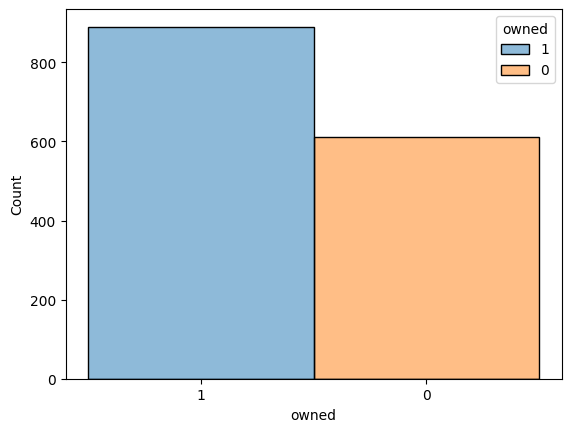

In [356]:
sns.histplot(data=data, x='owned', hue="owned")
plt.show()

There are more people who left reviews that are owners versus non-owners, but the distribution is not highly imbalanced. The ratio I would look for in an imbalanced variable would be a ratio of about 10 to 1 for either category.

## Task 3
Describe the distribution of the overall rating of the possible values.

Here I will create the Density visualization using a Kernel Density Estimate, which is good for continuous data such as this.

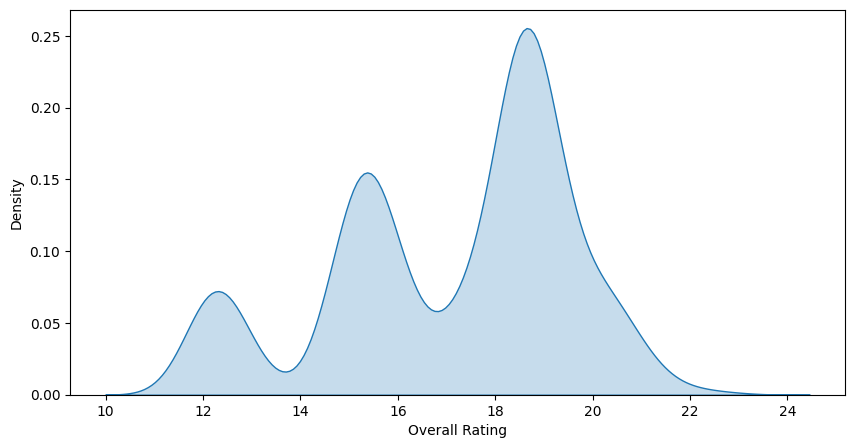

In [357]:
plt.figure(figsize=(10,5))
sns.kdeplot(data["overall_rating"], shade = True)
plt.xlabel("Overall Rating")
plt.show()

The distribution is multimodal, meaning there are multiple "peaks" and "valleys" that resemble multiple normal distributions within the same distribution. There are different subsets of datapoints here that have their own center and spread.

## Task 4
Describe the relationship between ownership and overall rating.

I will use a Violin Plot, which is similar to a boxplot but shows the distribution in each level of the variable of interest (in this case ownership) so we can see how owners and non-owners rate the motorcycles.

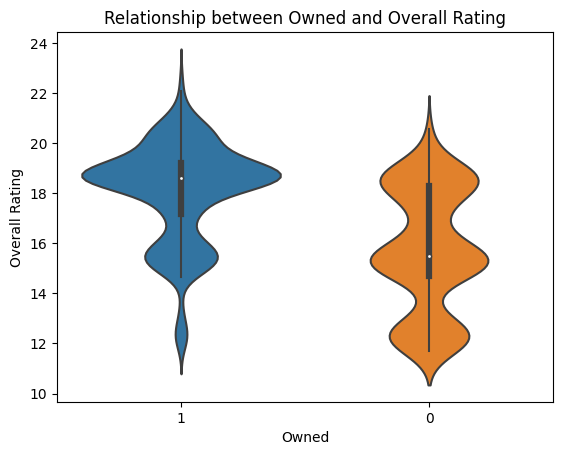

In [358]:
sns.violinplot(x = data['owned'], y = data['overall_rating'])
plt.xlabel('Owned')
plt.ylabel('Overall Rating')
plt.title('Relationship between Owned and Overall Rating')
plt.show()


There seems to be more of a tendency for the owners to rate the motorcycles higher, at least in comparison to the non-owners. There is an even distribution of good and bad ratings of the bikes for non-owners whereas owners rate them disproportionaltely higher.

## Task 5
This is a classification problem because we are predicting a binary (categorical) outcome. It is not a regression problem because we are predicting classes, not means. It is not a clustering problem because it is supervised learning.

## Task 6
Fit baseline model (Logistic Regression)

In [359]:
# baseline model: Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

data_encoded = pd.get_dummies(data.drop("owned", axis=1))
X = data_encoded
y = data["owned"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)

Here we fit a simple Logistic Regression model which takes all of the predictor variables into account in order to predict the outcome (Owned, Not Owned). It assumes a linear relationship on a log-odds scale and predicts class probabilities to predict a class. 

## Task 7
Fit comparison model (Support Vector Machine)

In [360]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

Here, we fit a Support Vector Machine which uses an optimized linear boundary to separate the classes based on the features to make predictions. 

## Task 8
I chose Logistic Regression and Support Vector Machine because they are both proven binary classification models to use, and can be compared to each other directly. The logistic regression model is a good place to start because it is more simple and interpretable, well-established and efficient. I chose Support Vector Machine because it has a defined decision boundary which is good for binary classification in this case. 

## Task 9
Compare model performance.

In [361]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_pred))

Logistic Regression Accuracy: 0.7466666666666667
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.63      0.67       120
           1       0.77      0.82      0.80       180

    accuracy                           0.75       300
   macro avg       0.74      0.73      0.73       300
weighted avg       0.74      0.75      0.74       300



In [362]:
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Support Vector Machine Classification Report:")
print(classification_report(y_test, svm_pred))

Support Vector Machine Accuracy: 0.76
Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       120
           1       0.78      0.84      0.81       180

    accuracy                           0.76       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.76      0.76      0.76       300



## Task 10
The Support Vector Machine performed very slightly better overall, in all metrics including accuracy, precision, recall and f1-score. This could be becuase of the SVM's ability to handle nonlinear relationships, which a logistic regression does not do. The SVM also maximizes the margin between classes, so it is possible that this attribute helped the performance over the logistic regression. It is important to note that the difference in performance between the two were very small. Ultimately our goal is to predict whether or not someone owns EMO's motorcycles based on their attributes such as overall rating, age, make/model, etc. and these models do a pretty good job at making those predictions, which will help EMO both improve the quality of their motorcycles based on owner ratings, and add new features based on non-owner ratings.

## ✅  When you have finished...
- Publish your Workspace using the option on the left
- Check the published version of your report:
	- Can you see everything you want us to grade?
    - Are all the graphics visible?
- Review the grading rubric. Have you included everything that will be graded?
- Head back to the [Certification dashboard](https://app.datacamp.com/certification) to submit your practical exam